# Tabu Search

> A meta-heuristic algorithm leveraging local search and memory structures. 
- toc: true
- use_math: true
- comments: true
- use_plotly: true
- image: images/local_search.png

# Background

# Tabu Search

Tabu Search is a meta-heuristic optimization algorithm leveraging **local search strategies** and **memory structures**. Since local search has the tendency to get stuck in local optima, it uses memory structures to help escape these optima by using an explorative strategy and avoiding previously visited nodes. The idea of prohibiting previously visited nodes is there name tabu comes from.  

## Local Search

The first main concept we'll go over is the idea of Local Search. In Local Search, we start with an initial viable solution and generate a set of neighbouring solutions. We then iterate through each solution of the set and continue the next iteration with the best neighbouring solution. We continue this algorithm until our termination criteria is met.

In [2]:
def generate_first_solution():
    pass

def generate_neighbourhood():
    pass

def objective_function():
    pass

def check_termination_criteria():
    pass

initial_solution = generate_first_solution()
current_solution = initial_solution

termination_criteria = False


while not termination_criteria:
    # initialize best neighbouring objective value and generate neighbours
    best_n_objective_fn = objective_function(current_solution)
    neighbours = generate_neighbourhood(current_solution)
    
    # iterate each neighbour
    for n in neighbours:
        current_objective_fn = objective_function(n)
        
        # find the best neighbour objective value to use for the next iteration
        # we're assuming we want to minimize the objective value in this scenario
        if n < best_n_objective_fn:
            best_n_objective_fn = current_objective_fn
            current_solution = n
            
    # check if termination criteria has been met yet
    if check_termination_criteria():
        termination_criteria = True

Although this approach is quite straightforward and quick to implement, it comes with its pitfalls. In some cases, it becomes computationally expensive to search all the possible neighbours of the current solution. On the other hand, considering only the immediate neighbours yields a very limited horizon and is also not efficient. This makes our algorithm susceptible to being stuck in local optima based on our neighbourhood generation.

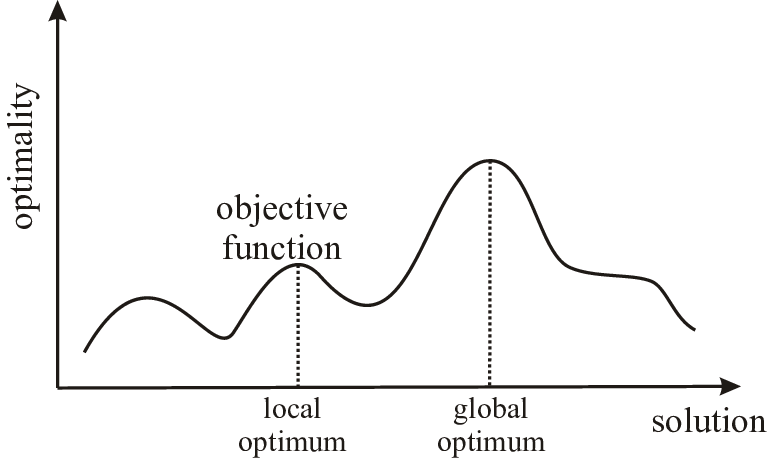

In [8]:
#hide_input
from IPython.display import Image
Image(filename='../assets/blogs/2021_12_22/local_search.png')

## Memory

In order to avoid the pitfall of local optima, Tabu Search incorporates two different memory structures. Short-term memory is based on the recency of occurrence to avoid previously visited solutions. This short-term structure could also be used to tabulate viable solutions and *intensify* the search at these solutions. Long-term memory is based on the frequency of occurrence starting from the beginning of the optimization. By keeping track of frequently visited solutions, it can diversify the search space by avoiding frequently visited solutions.

The short-term memory component is formerly known as the Tabu List. This structure stores a fixed and limited number of solutions for a number of iterations (T also known as the Tabu Tenure). 

## Neighbourhood